[Documentation of LBMPy](https://pycodegen.pages.i10git.cs.fau.de/lbmpy/notebooks/demo_automatic_chapman_enskog_analysis.html)

[Enhanced MRT](https://journals.aps.org/pre/pdf/10.1103/PhysRevE.102.023307)

[MRT Theory](https://journals.aps.org/pre/pdf/10.1103/PhysRevE.61.6546)

[Ulf repo](https://github.com/uschille/amrex-tutorials/blob/binary-fluctuating/GuidedTutorials/LBM/binary/binary-mrt-d3q19.ipynb)

1. [Analysis](#Moment-space-for-Ternary-Free-Energy-LBM)
    1. [Fluid 1](#Fluid-1)
    2. [Fluid 2](#Fluid-2)
    3. [Fluid 3](#Fluid-2)
2. [Gross et al. replication](#D2Q9-fluctuation-replication)

[Testing](#Test-Bed)

In [1]:
from lbmpy.session import *
import numpy as np
from lbmpy.moments import MOMENT_SYMBOLS, moment_matrix
import matplotlib.pyplot as plt
from lbmpy.chapman_enskog import ChapmanEnskogAnalysis
from lbmpy.methods import DensityVelocityComputation
from lbmpy.methods.creationfunctions import create_from_equilibrium

In [83]:
lb_config = LBMConfig(method=Method.TRT, stencil=Stencil.D2Q9, compressible=False, zero_centered=False)
method_demo = create_lb_method(lbm_config=lb_config)
method_demo

In [84]:
method_demo.moments

In [85]:
analysis_demo = ChapmanEnskogAnalysis(method)

In [86]:
analysis_demo.get_bulk_viscosity()

# Moment space for Ternary Free Energy LBM

[Ternary model](https://journals.aps.org/pre/pdf/10.1103/PhysRevE.93.033305)

In [2]:
# import sympy.abc as symbolic
# from lbmpy.chapman_enskog import ChapmanEnskogAnalysis
# 
# from lbmpy.methods import mrt_orthogonal_modes_literature
# from lbmpy.stencils import get_stencil
# 
# from lbmpy.moments import moment_matrix, moments_up_to_component_order, exponents_to_polynomial_representations

In [3]:
d3q19 = LBStencil(Stencil.D3Q19)
v = sp.Matrix(d3q19)

In [4]:
five36 = sp.Rational(5,36)
one9 = sp.Rational(1,9)
one12 = sp.Rational(1,12)
one36 = sp.Rational(1,36)
one72 = sp.Rational(1,72)

w_i = [ sp.Rational(1,3) ] + [ sp.Rational(1,18) ]*6 + [ sp.Rational(1,36) ]*12

ww =  [ [[0]*3]*3 ] \
    + [ [ [ -one9, 0, 0], [0, five36, 0], [0, 0,  -one9] ] ]*2 \
    + [ [ [five36, 0, 0], [0,  -one9, 0], [0, 0,  -one9] ] ]*2 \
    + [ [ [ -one9, 0, 0], [0,  -one9, 0], [0, 0, five36] ] ]*2 \
    + [ [ [-one72, -one12, 0], [ -one12, -one72, 0], [ 0, 0, one36] ],
        [ [-one72,  one12, 0], [  one12, -one72, 0], [ 0, 0, one36] ],
        [ [-one72,  one12, 0], [  one12, -one72, 0], [ 0, 0, one36] ],
        [ [-one72, -one12, 0], [ -one12, -one72, 0], [ 0, 0, one36] ],
        [ [ one36, 0, 0], [ 0, -one72,  one12], [ 0,  one12, -one72] ],
        [ [ one36, 0, 0], [ 0, -one72, -one12], [ 0, -one12, -one72] ],
        [ [-one72, 0, -one12], [ 0, one36, 0], [ -one12, 0, -one72] ],
        [ [-one72, 0,  one12], [ 0, one36, 0], [  one12, 0, -one72] ],
        [ [ one36, 0, 0], [ 0, -one72, -one12], [ 0, -one12, -one72] ],
        [ [ one36, 0, 0], [ 0, -one72,  one12], [ 0,  one12, -one72] ],
        [ [-one72, 0,  one12], [ 0, one36, 0], [  one12, 0, -one72] ],
        [ [-one72, 0, -one12], [ 0, one36, 0], [ -one12, 0, -one72] ] ]

In [5]:
x, y, z = MOMENT_SYMBOLS
rho = sp.symbols('rho',cls=sp.Function)(x,y,z)
phi = sp.symbols('phi',cls=sp.Function)(x,y,z)
psi = sp.symbols('psi',cls=sp.Function)(x,y,z)
gamma_p = sp.symbols("\Gamma_{\phi}")
gamma_s = sp.symbols('\Gamma_{\psi}')
mu_p = sp.symbols("\mu_{\phi}")
mu_s = sp.symbols("\mu_{\psi}")

u = sp.Matrix(sp.symbols('u_0, u_1, u_2'))
cs = sp.sqrt(sp.Rational(1,3))
pb = sp.symbols('p_b')
deviation = False

krr = sp.Symbol(r"k_{\rho\rho}")
kpp = sp.Symbol(r"k_{\phi\phi}")
kss = sp.Symbol(r"k_{\psi\psi}")

one = sp.core.sympify(1)
two = sp.core.sympify(2)
three = sp.core.sympify(3)
five = sp.core.sympify(5)
six = sp.core.sympify(6)

c2 = x**2 + y**2 + z**2
c4 = c2**2

zeroth_order = [one]
first_order = [x, y, z]
second_order = [c2 - 1, 3*x**2 - c2, y**2 - z**2, x*y, y*z, z*x]
third_order = [(3*c2 - 5)*x, (3*c2 - 5)*y, (3*c2 - 5)*z, (y**2 - z**2)*x, (z**2 - x**2)*y, (x**2 - y**2)*z]
fourth_order = [3*c4 - 6*c2 + 1, (2*c2 - 3)*(3*x**2 - c2), (2*c2 - 3)*(y**2 - z**2)]

moments = [*zeroth_order, *first_order, *second_order, *third_order, *fourth_order]

In [6]:
M = moment_matrix(moments, stencil=d3q19)
M

⎡1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 ⎤
⎢                                                                          ⎥
⎢0   0   0   -1  1   0   0   -1  1   -1  1   0   0   -1  1   0   0   -1  1 ⎥
⎢                                                                          ⎥
⎢0   1   -1  0   0   0   0   1   1   -1  -1  1   -1  0   0   1   -1  0   0 ⎥
⎢                                                                          ⎥
⎢0   0   0   0   0   1   -1  0   0   0   0   1   1   1   1   -1  -1  -1  -1⎥
⎢                                                                          ⎥
⎢-1  0   0   0   0   0   0   1   1   1   1   1   1   1   1   1   1   1   1 ⎥
⎢                                                                          ⎥
⎢0   -1  -1  2   2   -1  -1  1   1   1   1   -2  -2  1   1   -2  -2  1   1 ⎥
⎢                                                                          ⎥
⎢0   1   1   0   0   -1  -1  1   1   1   1   0   0   -1  -1  0   0   -1  -1⎥

## Fluid 1

In [7]:
coords = [x, y, z]

# Interfacial energy terms
del_rho = sum([sp.Derivative(rho, co, 2) for co in coords ])
del_phi = sum([sp.Derivative(phi, co, 2) for co in coords ])
del_psi = sum([sp.Derivative(psi, co, 2) for co in coords ])

sum_energy = krr*rho*del_rho + kpp*phi*del_phi + kss*psi*del_psi

# mixing terms

mix_rho = sp.Matrix([[sp.Derivative(rho, co1)*sp.Derivative(rho, co2) for co2 in coords] for co1 in coords])
mix_phi = sp.Matrix([[sp.Derivative(phi, co1)*sp.Derivative(phi, co2) for co2 in coords] for co1 in coords])
mix_psi = sp.Matrix([[sp.Derivative(psi, co1)*sp.Derivative(psi, co2) for co2 in coords] for co1 in coords])

mix_terms = krr*mix_rho + kpp*mix_phi + kss*mix_psi

In [8]:
def f_i(i):
    # Term 1
    e = v[i, :]
    e2 = e.T*e
    u2 = u*u.T
    dab = sp.eye(3)
    
    term1 = w_i[i]*(pb/cs**2 + rho*sum(e*u)/cs**2 + (1/(2*cs**4)*rho*(u.T@(e2 - cs**2*dab))@u)[0])
    
    # Term 2
    term2 = -w_i[i]/cs**2*sum_energy
    
    # Term 3
    trace = sum([ ww[i][j][j]*mix_terms[j,j] for j in range(3) ])
    traceless = sum([ ww[i][j][(j+1)%3]*mix_terms[j, (j+1)%3] for j in range(3) ])
    term3 = (trace + traceless)/cs**2
    
    return term1 + term2 + term3

In [9]:
feq = sp.Matrix([f_i(i) for i in range(19)])
feq[0] = rho - sum(feq[1:])

mf = M@feq
mf = sp.simplify(mf)
mf

⎡                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                              2                                           2  
⎢                             ∂                                           ∂   
⎢- 3⋅k_{\phi\phi}⋅φ(x, y, z)⋅───(φ(x, y, z)) - 3⋅k_{

## Fluid 2

In [10]:
def g_i(i):
    # Term 1
    e = v[i, :]
    e2 = e.T*e
    u2 = u*u.T
    dab = sp.eye(3)
    
    term1 = w_i[i]*((gamma_p*mu_p)/cs**2 + phi*sum(e*u)/cs**2 + (1/(2*cs**4)*phi*(u.T@(e2 - cs**2*dab))@u)[0])
    return term1
    
geq = sp.Matrix([g_i(i) for i in range(19)])
geq[0] = phi - sum(geq[1:])

In [11]:
geq = sp.Matrix([g_i(i) for i in range(19)])
geq[0] = phi - sum(geq[1:])

In [12]:
mg = M@geq
mg = sp.simplify(mg)
mg

⎡                                        φ(x, y, z)                           
⎢                                                                             
⎢                                      u₀⋅φ(x, y, z)                          
⎢                                                                             
⎢                                      u₁⋅φ(x, y, z)                          
⎢                                                                             
⎢                                      u₂⋅φ(x, y, z)                          
⎢                                                                             
⎢                               2                2                2           
⎢3⋅\Gamma_{\phi}⋅\mu_{\phi} + u₀ ⋅φ(x, y, z) + u₁ ⋅φ(x, y, z) + u₂ ⋅φ(x, y, z)
⎢                                                                             
⎢                              ⎛    2     2     2⎞                            
⎢                              ⎝2⋅u₀  - u₁  - u₂ ⎠⋅φ

## Fluid 3

In [13]:
def k_i(i):
    # Term 1
    e = v[i, :]
    e2 = e.T*e
    u2 = u*u.T
    dab = sp.eye(3)
    
    term1 = w_i[i]*((gamma_s*mu_s)/cs**2 + psi*sum(e*u)/cs**2 + (1/(2*cs**4)*psi*(u.T@(e2 - cs**2*dab))@u)[0])
    return term1
    
keq = sp.Matrix([k_i(i) for i in range(19)])
keq[0] = psi - sum(keq[1:])

In [14]:
keq = sp.Matrix([k_i(i) for i in range(19)])
keq[0] = psi - sum(keq[1:])

In [15]:
mk = M@keq
mk = sp.simplify(mk)
mk

⎡                                        ψ(x, y, z)                           
⎢                                                                             
⎢                                      u₀⋅ψ(x, y, z)                          
⎢                                                                             
⎢                                      u₁⋅ψ(x, y, z)                          
⎢                                                                             
⎢                                      u₂⋅ψ(x, y, z)                          
⎢                                                                             
⎢                               2                2                2           
⎢3⋅\Gamma_{\psi}⋅\mu_{\psi} + u₀ ⋅ψ(x, y, z) + u₁ ⋅ψ(x, y, z) + u₂ ⋅ψ(x, y, z)
⎢                                                                             
⎢                              ⎛    2     2     2⎞                            
⎢                              ⎝2⋅u₀  - u₁  - u₂ ⎠⋅ψ

# D2Q9 fluctuation replication

[Binary free energy model](https://journals.aps.org/pre/pdf/10.1103/PhysRevE.54.5041)

[Fluctuations](https://journals.aps.org/pre/pdf/10.1103/PhysRevE.82.056714)

[2 Phase](#2-phase-model)

[2 Component](#2-component-model)

In [15]:
d2q9 = LBStencil(Stencil.D2Q9)

In [3]:
v = sp.Matrix(d2q9)
Q = v.shape[0]
d = v.shape[1]

x, y, z = MOMENT_SYMBOLS
zero = sp.core.sympify(0)
one = sp.core.sympify(1)

c2 = x**2 + y**2
c4 = c2**2

zeroth_order = [one]
first_order = [x, y]
second_order = [3*c2 - 2, 2*x**2 - c2, x*y]
third_order = [(3*c2 - 4)*x, (3*c2 - 4)*y, 9*c4 - 15*c2 + 2]

moments = [*zeroth_order, *first_order, *second_order, *third_order]
M = moment_matrix(moments, stencil=d2q9)
M

⎡1   1   1   1   1   1   1  1   1 ⎤
⎢                                 ⎥
⎢0   0   0   -1  1   -1  1  -1  1 ⎥
⎢                                 ⎥
⎢0   1   -1  0   0   1   1  -1  -1⎥
⎢                                 ⎥
⎢-2  1   1   1   1   4   4  4   4 ⎥
⎢                                 ⎥
⎢0   -1  -1  1   1   0   0  0   0 ⎥
⎢                                 ⎥
⎢0   0   0   0   0   -1  1  1   -1⎥
⎢                                 ⎥
⎢0   0   0   1   -1  -2  2  -2  2 ⎥
⎢                                 ⎥
⎢0   -1  1   0   0   2   2  -2  -2⎥
⎢                                 ⎥
⎣2   -4  -4  -4  -4  8   8  8   8 ⎦

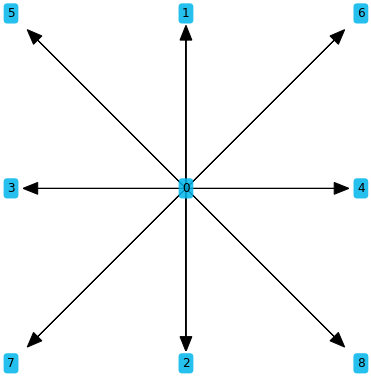

In [16]:
four9 = sp.Rational(4, 9)
one9 = sp.Rational(1, 9)
one12 = sp.Rational(1, 12)
one18 = sp.Rational(1, 18)
one36 = sp.Rational(1, 36)
one72 = sp.Rational(1, 72)


w_i = [four9] + [one9]*4 + [one36]*4

ww =  [ [[0]*2]*2 ] \
    + [ [ [  -one18, 0 ], [ 0, 2*one18 ] ] ]*2 \
    + [ [ [ 2*one18, 0 ], [ 0,  -one18 ] ] ]*2 \
    + [ [ [ -one72, -one12 ], [ -one12, -one72 ] ],
        [ [ -one72,  one12 ], [  one12, -one72 ] ],
        [ [ -one72,  one12 ], [  one12, -one72 ] ],
        [ [ -one72, -one12 ], [ -one12, -one72 ] ] ]
d2q9.plot()

## 2 phase model

### Equilibrium equation

To allow for relaxation of the system to equilibrium, an equilibrium distribution must be computed. According to Swift et al, the equilibrium distribution for the 2 phase model is defined as, 

$$ f_{i}^{eq} = \frac{w_{i}}{c_s^2} [p_b + \rho \cdot u_{\alpha}e_{i \alpha} + (\frac{\rho}{c_s^2})(u_{\alpha}u_{\beta}e_{i\alpha}e_{i\beta} - \delta_{\alpha \beta}c_s^2  ) ] - \frac{w_{i}}{c_s^2}\kappa \rho \nabla^2\rho + G_{\alpha \beta}e_{i\alpha}e_{i\beta}$$

In [5]:
rho_real = sp.symbols('rho',cls=sp.Function)(x,y)
rho = sp.symbols('rho')

u = sp.Matrix(sp.symbols('u_0, u_1'))
cs = sp.sqrt(sp.Rational(1,3))
kappa = sp.Symbol(r"\kappa")
pb = sp.symbols('p_b')

coords = [x, y]
del_rho = kappa*rho_real*sum([sp.Derivative(rho_real, co, 2) for co in coords ])
grad_rho = sp.Matrix([sp.Derivative(rho_real, co, 1) for co in coords ])

# G_xx = ( sp.Derivative(rho_real, x, 1)**2 - sp.Derivative(rho_real, y, 1)**2 )
# G_yy = -G_xx
G_xx = ( sp.Derivative(rho_real, x, 1)**2)
G_yy = ( sp.Derivative(rho_real, y, 1)**2)

G_xy = ( sp.Derivative(rho_real, x, 1)*sp.Derivative(rho_real, y, 1))
G = sp.Matrix([[G_xx, G_xy], [G_xy, G_yy]])

def f_i(i):
    d = v.shape[-1]
    e = v[i, :]
    dab = sp.eye(d)
    
    coeff = w_i[i]/cs**2
    
    term1 = pb
    term2 = rho_real*u.dot(e)
    term3 = (rho_real/(2*cs**2))*(u.T*(e.T*e - cs**2*dab)*u)[0]

    term4 = sum([ ww[i][j][j]/cs**2*G[j,j] for j in range(2) ]) \
        + sum([ ww[i][j][(j+1)%2]/cs**2*G[j,(j+1)%2] for j in range(1) ])
    
    feq = coeff*(term1 + term2 + term3) - coeff*(del_rho) + kappa*term4 #/(cs**4)*term4
    return feq

f_eq = sp.Matrix([f_i(i) for i in range(Q)])
f_eq[0] = rho_real - sum(f_eq[1:])

mf = sp.simplify(M@f_eq)
mf

⎡                                                               ρ(x, y)                                                               ⎤
⎢                                                                                                                                     ⎥
⎢                                                             u₀⋅ρ(x, y)                                                              ⎥
⎢                                                                                                                                     ⎥
⎢                                                             u₁⋅ρ(x, y)                                                              ⎥
⎢                                                                                                                                     ⎥
⎢                              2                               2                                                                      ⎥
⎢                             ∂                 

### Bulk Pressure

$$ p_b = \rho \psi' - \psi$$

$$ \psi = \rho T ln(\frac{\rho}{1 - \rho b}) - a \rho^2$$

$$ \psi' = \frac{d \psi }{d \rho} = T(1 - \frac{2 \rho}{21})( \frac{2\rho}{21(1 - \frac{2 \rho}{21})} + \frac{1}{1 - \frac{2 \rho}{21}}) + T ln(\frac{\rho}{1 - \frac{2 \rho}{21}}) - \frac{18 \rho}{49} $$

a = $\frac{9}{49}$ and b = $\frac{2}{21}$

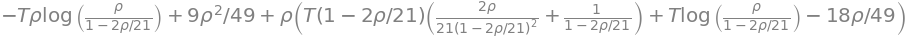

In [6]:
psi = sp.Function('psi')(rho)
a = sp.Rational(9, 49)
b = sp.Rational(2, 21)
T = sp.Symbol('T')
psi = rho*T*sp.log(rho/(1 - b*rho)) - a*rho**2
dpsi = sp.Derivative(psi, rho).doit()
p0 = rho*dpsi - psi
p0

In [7]:
T_sim = sp.Rational(1, 2)
k_sim = sp.Rational(2, 100)

sub_feq = f_eq.subs({pb:p0})
sub_feq = test_feq.subs({rho_real:rho, T:T_sim, kappa:k_sim})

In [8]:
omega = sp.symbols("omega")
relaxation_rate_dict = {moment : omega for moment in moments}
cqc = DensityVelocityComputation(d2q9, True, False)
# equilibrium = lbmpy.equilibrium.GenericDiscreteEquilibrium(d2q9, f_eq, rho_real, u)
equilibrium = lbmpy.equilibrium.GenericDiscreteEquilibrium(d2q9, sub_feq, rho, u)

In [9]:
method = create_from_equilibrium(d2q9, equilibrium, cqc, relaxation_rate_dict)
analysis = ChapmanEnskogAnalysis(method)

In [13]:
analysis

## 2 component model

In [21]:
rho = sp.Function('rho')(x, y)
phi = sp.Function('psi')(x, y)

u = sp.Matrix(sp.symbols('u_0, u_1'))
cs = sp.sqrt(sp.Rational(1,3))
pb = sp.symbols('p_b')
deviation = False

kappa = sp.Symbol(r"\kappa")

coords = [x, y]

# Interfacial energy terms
sum_energy = zero
del_rho = kappa*rho*sum([sp.Derivative(rho, co, 2) for co in coords ])
del_phi = kappa*phi*sum([sp.Derivative(phi, co, 2) for co in coords ])

G_xx = (sp.Derivative(rho, x, 1)**2 + sp.Derivative(phi, x, 1)**2)
G_yy = (sp.Derivative(rho, y, 1)**2 + sp.Derivative(phi, y, 1)**2)

G_xy = ( sp.Derivative(rho, x, 1)*sp.Derivative(rho, y, 1) + sp.Derivative(phi, x, 1)*sp.Derivative(phi, y, 1) )
G = sp.Matrix([[G_xx, G_xy], [G_xy, G_yy]])

def f_i(i):
    d = v.shape[-1]
    e = v[i, :]
    dab = sp.eye(d)
    
    coeff = w_i[i]/cs**2
    
    term1 = pb
    term2 = rho*u.dot(e)
    term3 = (rho/(2*cs**2))*(u.T*(e.T*e - cs**2*dab)*u)[0]
    
    # ww_curr = ww[i]
    # term4 = (e*(G*sp.Matrix(ww_curr))*e.T)[0]
    
    term4 = sum([ ww[i][j][j]/cs**2*G[j,j] for j in range(2) ]) \
    + sum([ ww[i][j][(j+1)%2]/cs**2*G[j,(j+1)%2] for j in range(1) ])
    
    feq = coeff*(term1 + term2 + term3) - coeff*(del_rho + del_phi) + (kappa/cs**2)*term4
    return feq

f_eq = sp.Matrix([f_i(i) for i in range(Q)])
f_eq[0] = rho - sum(f_eq[1:])

mf = sp.simplify(M@f_eq)
mf

⎡                                                                                                                         ρ(x, y)                                                                        
⎢                                                                                                                                                                                                        
⎢                                                                                                                       u₀⋅ρ(x, y)                                                                       
⎢                                                                                                                                                                                                        
⎢                                                                                                                       u₁⋅ρ(x, y)                                                              

In [22]:
gamma = sp.Symbol('Gamma')
del_mu = sp.Symbol(r"\Delta\mu")

def g_i(i):
    d = v.shape[-1]
    e = v[i, :]
    dab = sp.eye(d)
    
    coeff = w_i[i]/cs**2
    
    term1 = gamma*del_mu
    term2 = phi*u.dot(e)
    term3 = (phi/(2*cs**2))*(u.T*(e.T*e - cs**2*dab)*u)[0]
    
    geq = coeff*(term1 + term2 + term3)
    return geq

g_eq = sp.Matrix([g_i(i) for i in range(Q)])
g_eq[0] = phi - sum(g_eq[1:])

mg = sp.simplify(M@g_eq)
mg

⎡                         ψ(x, y)                         ⎤
⎢                                                         ⎥
⎢                       u₀⋅ψ(x, y)                        ⎥
⎢                                                         ⎥
⎢                       u₁⋅ψ(x, y)                        ⎥
⎢                                                         ⎥
⎢                    2               2                    ⎥
⎢6⋅Γ⋅\Delta\mu + 3⋅u₀ ⋅ψ(x, y) + 3⋅u₁ ⋅ψ(x, y) - 2⋅ψ(x, y)⎥
⎢                                                         ⎥
⎢                   ⎛  2     2⎞                           ⎥
⎢                   ⎝u₀  - u₁ ⎠⋅ψ(x, y)                   ⎥
⎢                                                         ⎥
⎢                      u₀⋅u₁⋅ψ(x, y)                      ⎥
⎢                                                         ⎥
⎢                            0                            ⎥
⎢                                                         ⎥
⎢                            0          

In [ ]:
f_eq

In [24]:
k = sp.Symbol('k')
# cs_k = sp.symbols('c_s^2',cls=sp.Function)(k)
cs_k = sp.symbols('c_s')
rho0 = sp.symbols('rho_0')
phi0 = sp.symbols('phi_0')

cs_2 = cs_k**2 + kappa*k**2*rho0

df_eq = f_eq.subs(pb, rho*cs_2).subs(u[0], 0).subs(u[1], 0).subs(rho, rho0).subs(phi, 0)
# S = sp.symbols('S', cls=sp.Function)(k)/rho0 * sp.diag(*df_eq)
S_rr = sp.Function('S_rho_rho')(k)/rho0*sp.diag(*df_eq)
G_rho = sp.simplify(M*S_rr*M.T)
G_rho

⎡                                                                                                        ⎛          2          2    ⎞                                                                    
⎢                Sᵨ ᵨ(k)                                0                             0                2⋅⎝3⋅\kappa⋅k ⋅ρ₀ + 3⋅cₛ  - 1⎠⋅Sᵨ ᵨ(k)                0                              0            
⎢                                                                                                                                                                                                        
⎢                                          ⎛        2        2⎞                                                                                                                                          
⎢                   0                      ⎝\kappa⋅k ⋅ρ₀ + cₛ ⎠⋅Sᵨ ᵨ(k)               0                                  0                                   0                              0   

In [25]:
dg_eq = g_eq.subs(pb, rho*cs_2).subs(u[0], 0).subs(u[1], 0).subs(rho, rho0).subs(phi, 0)

S_pp = sp.symbols('S_phi_phi', cls=sp.Function)(k)/phi0 * sp.diag(*dg_eq)
G_phi = sp.simplify(M*S_pp*M.T)
G_phi

⎡                                                                   6⋅Γ⋅\Delta\mu⋅Sᵩ ᵩ(k)                                                                                             -6⋅Γ⋅\Delta\mu⋅Sᵩ ᵩ
⎢           0                      0                    0           ─────────────────────             0                     0                     0                      0            ───────────────────
⎢                                                                             φ₀                                                                                                                 φ₀      
⎢                                                                                                                                                                                                        
⎢                         Γ⋅\Delta\mu⋅Sᵩ ᵩ(k)                                                                                                                                                   

In [26]:
G = sp.Matrix([[G_rho, sp.zeros(Q)], [sp.zeros(Q), G_phi]])
G

⎡                                                                                                        ⎛          2          2    ⎞                                                                    
⎢                Sᵨ ᵨ(k)                                0                             0                2⋅⎝3⋅\kappa⋅k ⋅ρ₀ + 3⋅cₛ  - 1⎠⋅Sᵨ ᵨ(k)                0                              0            
⎢                                                                                                                                                                                                        
⎢                                          ⎛        2        2⎞                                                                                                                                          
⎢                   0                      ⎝\kappa⋅k ⋅ρ₀ + cₛ ⎠⋅Sᵨ ᵨ(k)               0                                  0                                   0                              0   

In [93]:
lb,ls,lq,le = sp.symbols('lambda_b, lambda_s, lambda_q, lambda_epsilon')
d = 6*(cs_k**2 + rho0*kappa*k**2 - cs**2)
Omega = sp.zeros(Q,Q)
Omega[3,3] = lb
Omega[4,4] = ls
Omega[6,6] = lq
Omega[8,8] = le
Omega[5,5] = Omega[4,4]
Omega[7,7] = Omega[6,6]
Omega[3,0] = -lb*d
Omega[8,0] = le*d
Omega

⎡                  0                    0  0   0   0   0    0    0      0    ⎤
⎢                                                                            ⎥
⎢                  0                    0  0   0   0   0    0    0      0    ⎥
⎢                                                                            ⎥
⎢                  0                    0  0   0   0   0    0    0      0    ⎥
⎢                                                                            ⎥
⎢       ⎛          2          2    ⎞                                         ⎥
⎢  -λ_b⋅⎝6⋅\kappa⋅k ⋅ρ₀ + 6⋅cₛ  - 2⎠    0  0  λ_b  0   0    0    0      0    ⎥
⎢                                                                            ⎥
⎢                  0                    0  0   0   λₛ  0    0    0      0    ⎥
⎢                                                                            ⎥
⎢                  0                    0  0   0   0   λₛ   0    0      0    ⎥
⎢                                                   

In [94]:
Lambda = sp.eye(Q)+Omega
Xi = sp.simplify(G-Lambda@G@Lambda.T)
Xi

⎡                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                              0                                              
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                              0                    

# Test Bed

In [14]:
# equilibrium = lbmpy.equilibrium.GenericDiscreteEquilibrium(d3q19, feq, rho, u)

In [15]:
# omega = sp.symbols("omega")
# relaxation_rate_dict = {moment : omega for moment in moments}

# equilibrium = lbmpy.equilibrium.GenericDiscreteEquilibrium(d3q19, feq, rho, u)

# cqc = DensityVelocityComputation(d3q19, True, False)

# method = create_from_equilibrium(d3q19, equilibrium, cqc, relaxation_rate_dict)
# method